<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/SentAnalysisStockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:

news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table
    

In [ ]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Munger: 'The world would be better off without' SPACs
Feb-24-21 04:36PM  
AWS Announces General Availability of Amazon Lookout for Vision
04:29PM  
How Tesla and Elon Musk can fight the new EV rivals
04:10PM  
Seizure of contraband and unauthorized items at Cowansville Institution
03:52PM  


In [ ]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Feb-24-21',
  '04:36PM',
  "Munger: 'The world would be better off without' SPACs"],
 ['AMZN',
  'Feb-24-21',
  '04:29PM',
  'AWS Announces General Availability of Amazon Lookout for Vision'],
 ['AMZN',
  'Feb-24-21',
  '04:10PM',
  'How Tesla and Elon Musk can fight the new EV rivals'],
 ['AMZN',
  'Feb-24-21',
  '03:52PM',
  'Seizure of contraband and unauthorized items at Cowansville Institution'],
 ['AMZN',
  'Feb-24-21',
  '03:07PM',
  "Charlie Munger says Costco 'has one thing that Amazon does not'"],
 ['AMZN',
  'Feb-24-21',
  '02:34PM',
  'Charlie Munger: Costco presents some danger to Amazon'],
 ['AMZN',
  'Feb-24-21',
  '02:02PM',
  '20 Most Valuable Companies In The World in February 2021'],
 ['AMZN',
  'Feb-24-21',
  '01:23PM',
  '4 SPAC Mergers Worth $16 Billion Were Announced on Wednesday. What You Need to Know.'],
 ['AMZN',
  'Feb-24-21',
  '11:00AM',
  'Why Harley-Davidson Abandoned Its Amazon Storefront'],
 ['AMZN',
  'Feb-24-21',
  '10:54AM',
  'Lessons t

In [ ]:
import nltk
nltk.download('vader_lexicon')

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-02-24,04:36PM,Munger: 'The world would be better off without...,0.000,0.734,0.266,0.4404
1,AMZN,2021-02-24,04:29PM,AWS Announces General Availability of Amazon L...,0.000,0.654,0.346,0.4019
2,AMZN,2021-02-24,04:10PM,How Tesla and Elon Musk can fight the new EV r...,0.206,0.794,0.000,-0.3818
3,AMZN,2021-02-24,03:52PM,Seizure of contraband and unauthorized items a...,0.000,1.000,0.000,0.0000
4,AMZN,2021-02-24,03:07PM,Charlie Munger says Costco 'has one thing that...,0.000,0.855,0.145,0.1779


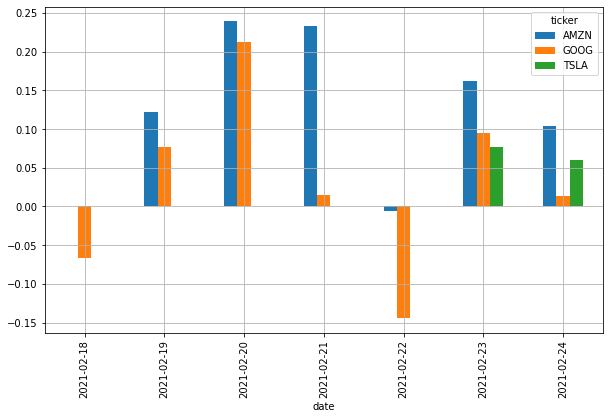

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()